## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [5]:
bank=pd.read_csv('banknotes.csv')
label=bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [6]:
X=bank.Bottom
Y=bank.Top

data_xy=np.zeros(2)
for i in range(len(X)):
    xy=np.zeros(0)
    xy=np.append(xy,X[i])
    xy=np.append(xy,Y[i])
    #display(xy)
    data_xy=np.vstack((data_xy,xy))

data_xy=data_xy[1:]
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

(6.925, 12.975, 7.47, 12.530000000000001)

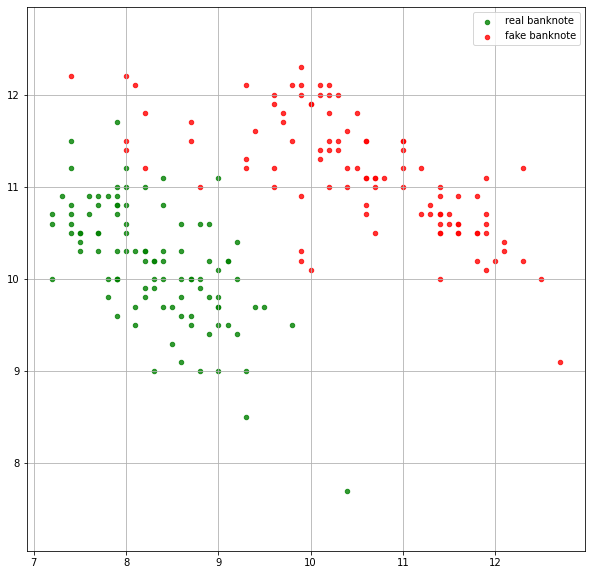

In [7]:
index_0=np.where(label==0)
#display(index_0)
index_1=np.where(label==1)
#display(index_1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here


for i in index_0 :
    label0=data_xy[i]

        
for i in index_1:
    label1=data_xy[i]
    
x1=np.zeros(0)
y1=np.zeros(0)
for i in range(len(label0)) :
    x1=np.append(x1,label0[i][0])
    y1=np.append(y1,label0[i][1])


x2=np.zeros(0)
y2=np.zeros(0)
for i in range(len(label1)) :
    x2=np.append(x2,label1[i][0])
    y2=np.append(y2,label1[i][1])   

    
plt.figure(figsize = (10, 10))
plt.scatter(x1,y1,c='green',label='real banknote',s=20,alpha=0.8)
plt.scatter(x2,y2,c='red',label='fake banknote',s=20,alpha=0.8)
plt.legend(loc='upper right')
plt.grid()
plt.axis('equal')



In [148]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here


dist_1 = np.linalg.norm(data_xy - data_xy[:,None],axis=-1)
dist_1.round(2)
dist_sq=np.square(dist_1)
dist_sq

 

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [31]:
#test
n=np.zeros(2)
nearest=np.partition(dist_sq[1],3)

#n=np.append(n,nearest[1:3])
n=np.vstack((n,nearest[1:3]))
n

array([[0.  , 0.  ],
       [0.04, 0.05]])

In [86]:
def nearest_partition(dist_sq, k):
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    n=np.zeros(k)
    for i in range(len(dist_sq )):        
        nearest=np.argpartition(dist_sq[i],k+1)
        #nearest=nearest[1:k+1]
        n=np.vstack((n,nearest[1:k+1]))
   
    return n[1:]

m=nearest_partition(dist_sq, 3)
m

array([[ 26.,  43.,   0.],
       [  6.,  16.,   1.],
       [ 91.,   2.,  86.],
       [ 73.,  61.,  81.],
       [  4.,  42.,  27.],
       [ 96.,  98.,  85.],
       [  6.,  39.,  49.],
       [  7.,  93.,  77.],
       [115.,  25.,  70.],
       [ 98.,  96.,   9.],
       [110., 181., 179.],
       [ 32.,  66.,  61.],
       [ 12.,  83.,  78.],
       [ 13.,  14.,  53.],
       [ 14.,  52.,  53.],
       [ 57.,  17.,  15.],
       [ 39.,  16.,  60.],
       [ 17.,  57.,  31.],
       [ 88.,  18., 110.],
       [ 19.,  23.,  68.],
       [ 20.,  19.,  60.],
       [ 21.,  59.,  97.],
       [ 22.,   8.,  70.],
       [ 72.,  23.,  76.],
       [ 93.,  47.,  77.],
       [ 58.,  78.,  69.],
       [ 26.,  82.,  43.],
       [ 51.,  35.,  55.],
       [ 61.,  77.,  73.],
       [ 31.,  38.,  57.],
       [ 12.,  30.,  62.],
       [ 57.,  38.,  29.],
       [ 32.,  66.,  61.],
       [ 33.,  87.,  46.],
       [ 65.,  64.,  56.],
       [ 51.,  55.,  67.],
       [ 90.,  91.,  36.],
 

In [60]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = 
index_1 = 


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(s=20, alpha=0.8)
plt.scatter(s=20, alpha=0.8)

        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here


 



SyntaxError: invalid syntax (Temp/ipykernel_2860/3905699389.py, line 4)

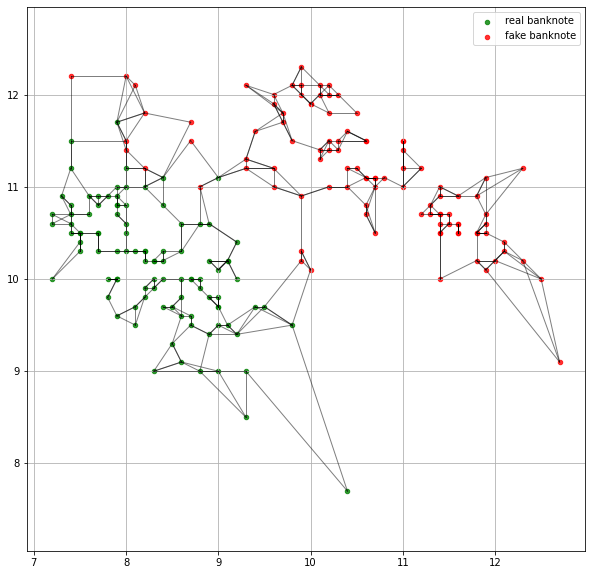

In [101]:
index_0=np.where(label==0)
#display(index_0)
index_1=np.where(label==1)
#display(index_1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

for i in index_0 :
    label0=data_xy[i]

        
for i in index_1:
    label1=data_xy[i]
    
x1=np.zeros(0)
y1=np.zeros(0)
for i in range(len(label0)) :
    x1=np.append(x1,label0[i][0])
    y1=np.append(y1,label0[i][1])


x2=np.zeros(0)
y2=np.zeros(0)
for i in range(len(label1)) :
    x2=np.append(x2,label1[i][0])
    y2=np.append(y2,label1[i][1])   

    
plt.figure(figsize = (10, 10))
plt.scatter(x1,y1,c='green',label='real banknote',s=20,alpha=0.8)
plt.scatter(x2,y2,c='red',label='fake banknote',s=20,alpha=0.8)
plt.legend(loc='upper right')
plt.grid()
plt.axis('equal')


# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here


K = 3

for i in range(data_xy.shape[0]):
    for j in m[i]:
        plt.plot(*zip(data_xy[int(j)],data_xy[i]),color='black',linewidth=1, alpha=0.5)


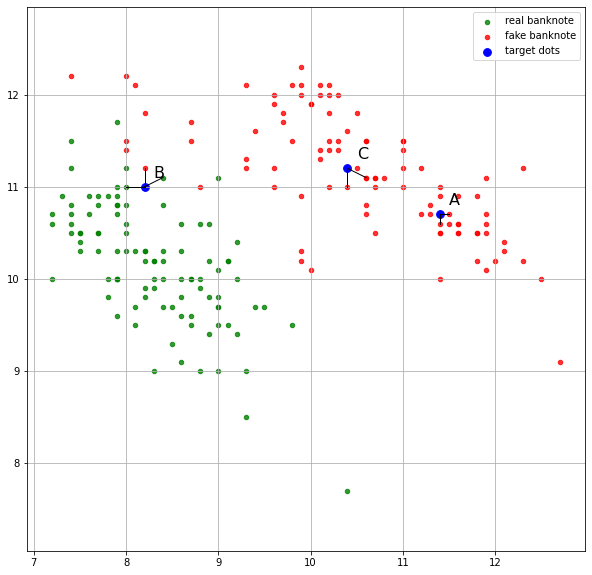

In [211]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0=np.where(label==0)
#display(index_0)
index_1=np.where(label==1)
#display(index_1)



# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here


for i in index_0 :
    label0=data_xy[i]

        
for i in index_1:
    label1=data_xy[i]
    
x1=np.zeros(0)
y1=np.zeros(0)
for i in range(len(label0)) :
    x1=np.append(x1,label0[i][0])
    y1=np.append(y1,label0[i][1])


x2=np.zeros(0)
y2=np.zeros(0)
for i in range(len(label1)) :
    x2=np.append(x2,label1[i][0])
    y2=np.append(y2,label1[i][1])   

    
plt.figure(figsize = (10, 10))
plt.scatter(x1,y1,c='green',label='real banknote',s=20,alpha=0.8)
plt.scatter(x2,y2,c='red',label='fake banknote',s=20,alpha=0.8)
plt.legend(loc='upper right')
plt.grid()
plt.axis('equal')



# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K = 3


m=nearest_partition(dist_sq, 3)
m

#提取出target的點
target__=np.zeros(2)
for i in target :
    target__=np.vstack((target__,data_xy[i]))

target__=target__[1:]
#display(target__)

for i in range(len(target__)) :
    plt.scatter(target__[i][0],target__[i][1],color='blue',s=60)
plt.legend(labels=['real banknote','fake banknote','target dots'])



distance1=np.zeros(data_xy.shape[0])
for i in range(len(target__)):
    distance=np.zeros(0)
    for l in range(len(data_xy)) :        
        dist_2=np.linalg.norm(target__[i]-data_xy[l])
        dist__sq=np.square(dist_2)
        dist__sq=dist__sq.round(2)
        distance=np.append(distance,dist__sq)
    distance1=np.vstack((distance1,distance))
distance1=distance1[1:]

m=nearest_partition(distance1, K)


for i in range(target__.shape[0]):
    for j in m[i]:
        plt.plot(*zip(data_xy[int(j)],target__[i]),color='black',linewidth=1)

for i in range(len(text)):
    plt.annotate(text[i], (target__[i][0],target__[i][1]),xytext=(target__[i][0]+0.1,target__[i][1]+0.1),fontsize=16)



### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：

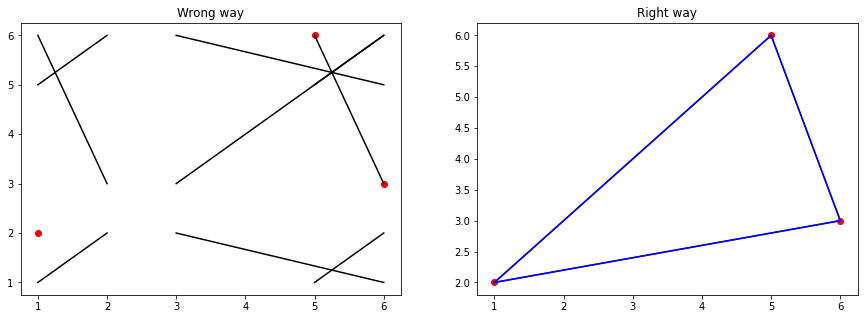

In [210]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')